# Content-Based Recommender System Demo

This notebook demonstrates how to use the content-based recommender system to generate personalized recommendations based on item attributes.

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add parent directory to path to import recommender module
sys.path.append('..')
from recommender.content_based import ContentBasedRecommender

## 1. Loading and Exploring the Dataset

In [2]:
# Load the dataset
movies_path = '../data/movies.csv'
movies = pd.read_csv(movies_path)

# Display the first few rows
print("Movies dataset preview:")
movies.head()

Movies dataset preview:


,Movie,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Thriller,Action,Horror,Num_Attr
0,Toy Story (1995),1,0,1,0,1,1,0,0,0,1,5
1,Jumanji (1995),0,1,1,1,0,0,0,1,0,0,4
2,Grumpier Old Men (1995),0,0,0,1,1,1,0,0,0,0,3
3,Waiting to Exhale (1995),0,0,1,1,0,0,1,1,0,0,4
4,Father of the Bride Part II (1995),0,1,0,0,0,0,0,0,1,1,3


In [3]:
# Explore dataset statistics
print(f"Dataset shape: {movies.shape}")
print(f"\nNumber of unique movies: {movies[movies.columns[0]].nunique()}")
print(f"\nGenre columns: {movies.columns[1:11].tolist()}")
print(f"\nSummary statistics:")
movies.describe()

Dataset shape: (20, 12)

Number of unique movies: 20

Genre columns: ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Thriller', 'Action', 'Horror']

Summary statistics:


,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Thriller,Action,Horror,Num_Attr
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000
mean,0.200000,0.300000,0.500000,0.550000,0.300000,0.300000,0.35000,0.300000,0.35000,0.250000,3.400000
std,0.410391,0.470162,0.512989,0.510418,0.470162,0.470162,0.48936,0.470162,0.48936,0.444262,0.940325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,3.000000
50%,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,3.500000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,0.250000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,5.000000


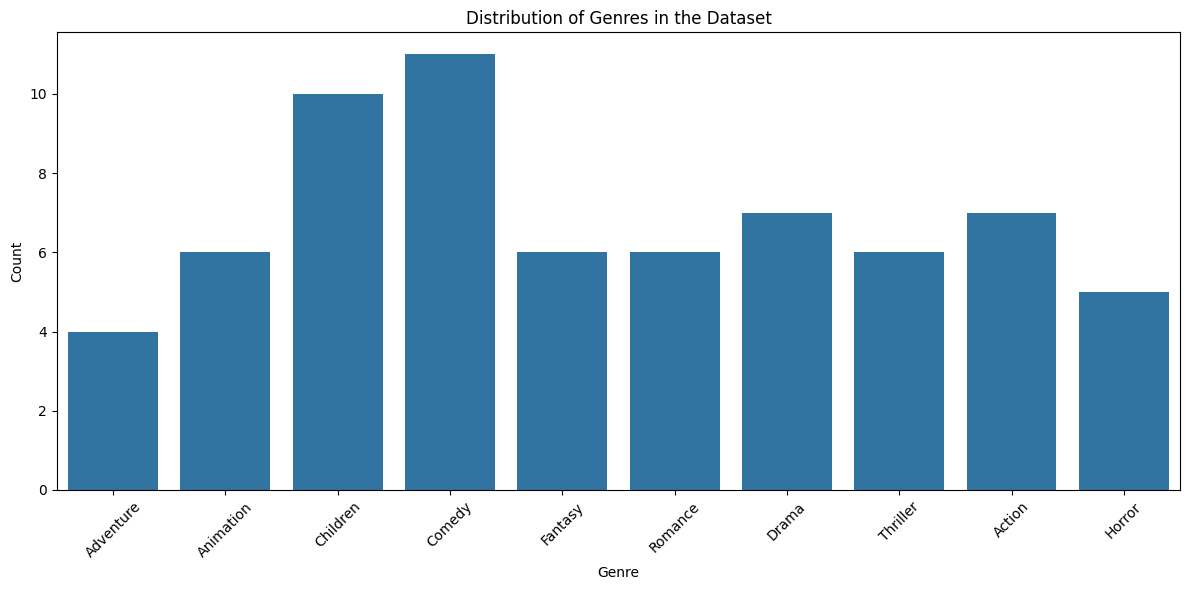

In [4]:
# Visualize the distribution of genres in the dataset
plt.figure(figsize=(12, 6))
genre_counts = movies.iloc[:, 1:11].sum()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Genres in the Dataset')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

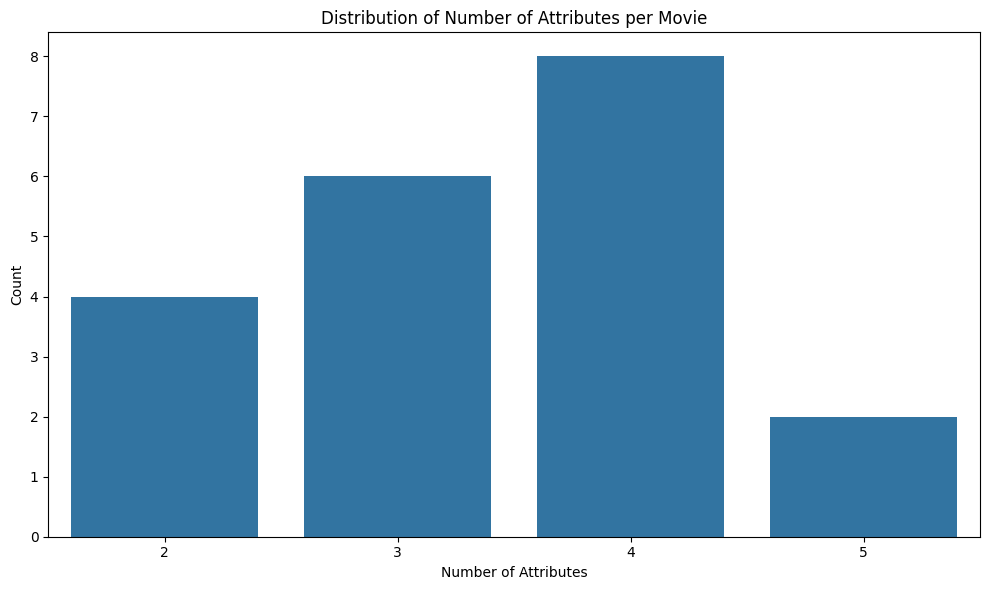

In [5]:
# Distribution of number of attributes per movie
plt.figure(figsize=(10, 6))
sns.countplot(x='Num_Attr', data=movies)
plt.title('Distribution of Number of Attributes per Movie')
plt.xlabel('Number of Attributes')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 2. Setting Up the Recommender

In [6]:
# Initialize the recommender system
recommender = ContentBasedRecommender()

In [7]:
# Load the data
recommender.load_data(movies_path)

Loaded 20 items with 10 attributes.


## 3. Adding User Ratings

In [8]:
# Define ratings for John and Joan
john_ratings = {0: 1, 1: -1, 5: 1, 15: 1, 18: -1}  # Movie indices with ratings (1=like, -1=dislike)
joan_ratings = {0: -1, 1: 1, 3: 1, 11: -1, 16: 1}

In [9]:
# Add user ratings
recommender.add_user_ratings('John', john_ratings)
recommender.add_user_ratings('Joan', joan_ratings)

Added ratings for user John (5 items rated).
Added ratings for user Joan (5 items rated).


In [10]:
# Display movies with their ratings for John
john_rated_movies = pd.DataFrame({
    'Movie': movies.iloc[list(john_ratings.keys()), 0].values,
    'Rating': list(john_ratings.values())
})
print("John's rated movies:")
john_rated_movies

John's rated movies:


,Movie,Rating
0,Toy Story (1995),1
1,Jumanji (1995),-1
2,Heat (1995),1
3,Casino (1995),1
4,Ace Ventura: When Nature Calls (1995),-1


In [11]:
# Display movies with their ratings for Joan
joan_rated_movies = pd.DataFrame({
    'Movie': movies.iloc[list(joan_ratings.keys()), 0].values,
    'Rating': list(joan_ratings.values())
})
print("Joan's rated movies:")
joan_rated_movies

Joan's rated movies:


,Movie,Rating
0,Toy Story (1995),-1
1,Jumanji (1995),1
2,Waiting to Exhale (1995),1
3,Dracula: Dead and Loving It (1995),-1
4,Sense and Sensibility (1995),1


## 4. Building User Profiles

In [12]:
# Get John's unweighted profile
john_unweighted_profile = recommender._build_user_profile('John', weighted=False)
print("John's unweighted profile:")
pd.DataFrame(john_unweighted_profile.reshape(1, -1), columns=movies.columns[1:11])

John's unweighted profile:


,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Thriller,Action,Horror
0,3.0,-2.0,-1.0,0.0,0.0,2.0,-1.0,-1.0,1.0,0.0


In [13]:
# Get John's weighted profile
john_weighted_profile = recommender._build_user_profile('John', weighted=True)
print("John's weighted profile:")
pd.DataFrame(john_weighted_profile.reshape(1, -1), columns=movies.columns[1:11])

John's weighted profile:


,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Thriller,Action,Horror
0,1.731671,-0.947214,-0.5,0.207107,0.0,1.024564,-0.447214,-0.5,0.57735,0.0


In [14]:
# Compare John's weighted and unweighted profiles visually
plt.figure(figsize=(12, 6))
indices = np.arange(len(movies.columns[1:11]))
width = 0.35

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 10 artists>

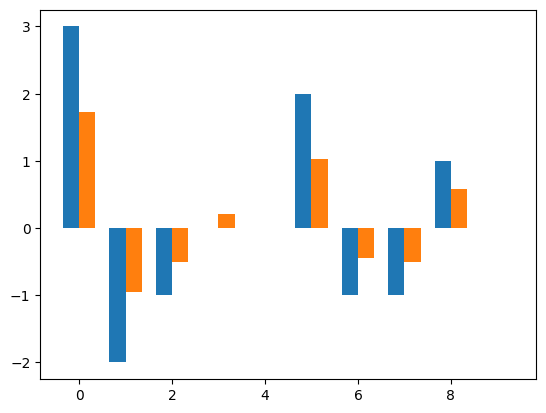

In [15]:
plt.bar(indices - width/2, john_unweighted_profile, width, label='Unweighted')
plt.bar(indices + width/2, john_weighted_profile, width, label='Weighted')

/var/folders/7d/y3djdq_x1hj177smytvvxt2m0000gn/T/ipykernel_69309/187711764.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


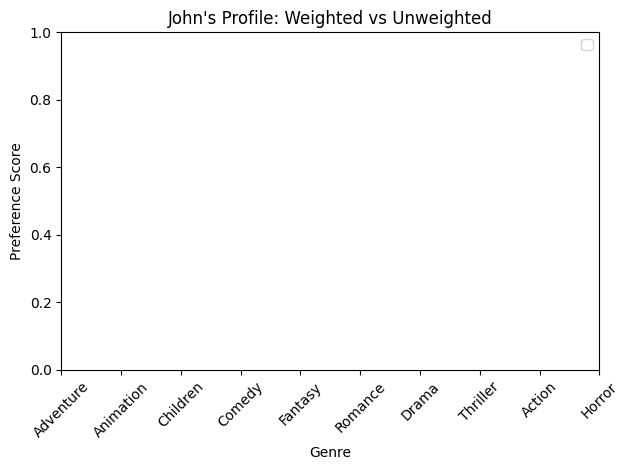

In [16]:
plt.xlabel('Genre')
plt.ylabel('Preference Score')
plt.title('John\'s Profile: Weighted vs Unweighted')
plt.xticks(indices, movies.columns[1:11], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 5. Generating Recommendations

In [17]:
# Generate predictions for John (unweighted)
john_preds_unweighted = recommender.generate_predictions('John', weighted=False)
print("John's unweighted predictions:")
john_preds_unweighted.sort_values('prediction', ascending=False).head(10)

John's unweighted predictions:


,item_index,item,rating,prediction
15,15,Casino (1995),1.0,6.0
0,0,Toy Story (1995),1.0,4.0
11,11,Dracula: Dead and Loving It (1995),0.0,4.0
8,8,Sudden Death (1995),0.0,3.0
5,5,Heat (1995),1.0,3.0
2,2,Grumpier Old Men (1995),0.0,2.0
17,17,Four Rooms (1995),0.0,1.0
14,14,Cutthroat Island (1995),0.0,0.0
10,10,American President The (1995),0.0,0.0
6,6,Sabrina (1995),0.0,-1.0


In [18]:
# Generate predictions for John (weighted)
john_preds_weighted = recommender.generate_predictions('John', weighted=True)
print("John's weighted predictions:")
john_preds_weighted.sort_values('prediction', ascending=False).head(10)

John's weighted predictions:


,item_index,item,rating,prediction
15,15,Casino (1995),1.0,1.924646
5,5,Heat (1995),1.0,1.370923
11,11,Dracula: Dead and Loving It (1995),0.0,1.333114
8,8,Sudden Death (1995),0.0,1.132724
0,0,Toy Story (1995),1.0,1.009019
2,2,Grumpier Old Men (1995),0.0,0.711105
17,17,Four Rooms (1995),0.0,0.554695
14,14,Cutthroat Island (1995),0.0,0.142229
10,10,American President The (1995),0.0,0.044658
19,19,Money Train (1995),0.0,-0.081378


In [19]:
# Get top 5 recommendations for John (unweighted)
john_recs_unweighted = recommender.get_recommendations('John', top_n=5, weighted=False)
print("Top 5 unweighted recommendations for John:")
john_recs_unweighted[['item', 'prediction']]

Top 5 unweighted recommendations for John:


,item,prediction
11,Dracula: Dead and Loving It (1995),4.0
8,Sudden Death (1995),3.0
2,Grumpier Old Men (1995),2.0
17,Four Rooms (1995),1.0
10,American President The (1995),0.0


In [20]:
# Get top 5 recommendations for John (weighted)
john_recs_weighted = recommender.get_recommendations('John', top_n=5, weighted=True)
print("Top 5 weighted recommendations for John:")
john_recs_weighted[['item', 'prediction']]

Top 5 weighted recommendations for John:


,item,prediction
11,Dracula: Dead and Loving It (1995),1.333114
8,Sudden Death (1995),1.132724
2,Grumpier Old Men (1995),0.711105
17,Four Rooms (1995),0.554695
14,Cutthroat Island (1995),0.142229


In [21]:
# Generate predictions for Joan (unweighted)
joan_preds_unweighted = recommender.generate_predictions('Joan', weighted=False)
print("Joan's unweighted predictions:")
joan_preds_unweighted.sort_values('prediction', ascending=False).head(10)

Joan's unweighted predictions:


,item_index,item,rating,prediction
16,16,Sense and Sensibility (1995),1.0,10.0
1,1,Jumanji (1995),1.0,10.0
3,3,Waiting to Exhale (1995),1.0,8.0
12,12,Balto (1995),0.0,7.0
13,13,Nixon (1995),0.0,7.0
19,19,Money Train (1995),0.0,5.0
7,7,Tom and Huck (1995),0.0,4.0
14,14,Cutthroat Island (1995),0.0,4.0
17,17,Four Rooms (1995),0.0,3.0
18,18,Ace Ventura: When Nature Calls (1995),0.0,2.0


In [22]:
# Generate predictions for Joan (weighted)
joan_preds_weighted = recommender.generate_predictions('Joan', weighted=True)
print("Joan's weighted predictions:")
joan_preds_weighted.sort_values('prediction', ascending=False).head(10)

Joan's weighted predictions:


,item_index,item,rating,prediction
16,16,Sense and Sensibility (1995),1.0,2.526393
1,1,Jumanji (1995),1.0,2.526393
3,3,Waiting to Exhale (1995),1.0,1.987718
12,12,Balto (1995),0.0,1.802786
13,13,Nixon (1995),0.0,1.776393
19,19,Money Train (1995),0.0,1.237718
17,17,Four Rooms (1995),0.0,1.060660
7,7,Tom and Huck (1995),0.0,1.014111
14,14,Cutthroat Island (1995),0.0,0.949043
6,6,Sabrina (1995),0.0,0.744432


## 6. Comparing Weighted and Unweighted Approaches

In [23]:
# Compare approaches for John
john_comparison = recommender.compare_approaches('John')
print("Comparison of approaches for John:")
john_comparison

Comparison of approaches for John:


,Approach,Best Unrated Item,Best Item Score,Disliked Items Count
0,Unweighted,Dracula: Dead and Loving It (1995),4.000000,11
1,Weighted,Dracula: Dead and Loving It (1995),1.333114,11


In [24]:
# Compare approaches for Joan
joan_comparison = recommender.compare_approaches('Joan')
print("Comparison of approaches for Joan:")
joan_comparison

Comparison of approaches for Joan:


,Approach,Best Unrated Item,Best Item Score,Disliked Items Count
0,Unweighted,Balto (1995),7.000000,4
1,Weighted,Balto (1995),1.802786,4


In [25]:
# Visualize prediction differences between weighted and unweighted approaches
plt.figure(figsize=(12, 8))
movie_indices = john_preds_unweighted['item_index'].values[:10]
movie_names = john_preds_unweighted['item'].values[:10]

<Figure size 1200x800 with 0 Axes>

In [26]:
x = np.arange(len(movie_indices))
width = 0.35

In [27]:
unweighted_scores = john_preds_unweighted.sort_values('prediction', ascending=False)['prediction'].values[:10]
weighted_scores = john_preds_weighted.loc[john_preds_unweighted.sort_values('prediction', ascending=False).index[:10], 'prediction'].values

<BarContainer object of 10 artists>

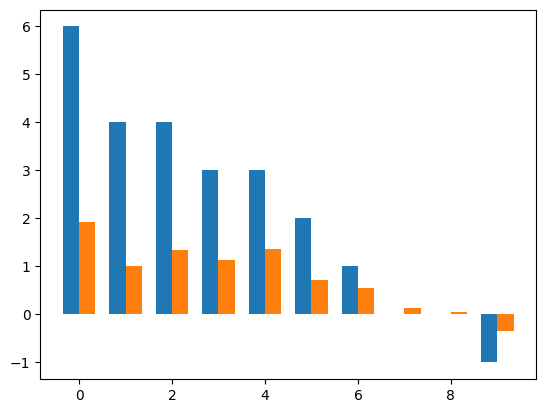

In [28]:
plt.bar(x - width/2, unweighted_scores, width, label='Unweighted')
plt.bar(x + width/2, weighted_scores, width, label='Weighted')

/var/folders/7d/y3djdq_x1hj177smytvvxt2m0000gn/T/ipykernel_69309/420091277.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


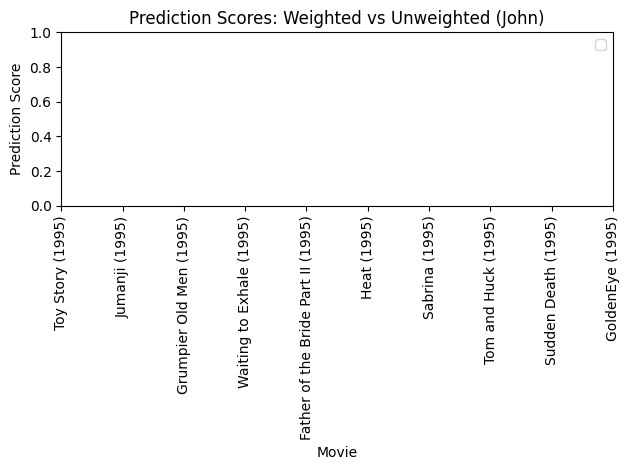

In [29]:
plt.xlabel('Movie')
plt.ylabel('Prediction Score')
plt.title('Prediction Scores: Weighted vs Unweighted (John)')
plt.xticks(x, movie_names, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

## 7. Discussion and Insights

In [30]:
# What we've learned:

"""
Key Insights:

1. Unweighted vs Weighted Profiles:
   - Unweighted profiles can be dominated by movies with many genres
   - Weighted profiles normalize the influence of each movie based on its attribute density

2. Recommendation Changes:
   - For John, the top recommendation stays the same in both approaches, suggesting a strong preference
   - For Joan, the weighted approach changes the ranking of recommendations slightly

3. When to Use Each Approach:
   - Unweighted: When all items have similar numbers of attributes or when absolute attribute matching is important
   - Weighted: When items have varying numbers of attributes and you want fair comparison

4. Real-world Applications:
   - Content-based recommenders work well for domains with rich item metadata
   - They can address the "cold start" problem for new users or items better than collaborative filtering

5. Limitations:
   - Content-based systems only recommend items similar to what users have already liked
   - They lack serendipity - the chance discovery of new, unexpected items
   - They require good quality metadata for items
"""

'\nKey Insights:\n\n1. Unweighted vs Weighted Profiles:\n   - Unweighted profiles can be dominated by movies with many genres\n   - Weighted profiles normalize the influence of each movie based on its attribute density\n\n2. Recommendation Changes:\n   - For John, the top recommendation stays the same in both approaches, suggesting a strong preference\n   - For Joan, the weighted approach changes the ranking of recommendations slightly\n\n3. When to Use Each Approach:\n   - Unweighted: When all items have similar numbers of attributes or when absolute attribute matching is important\n   - Weighted: When items have varying numbers of attributes and you want fair comparison\n\n4. Real-world Applications:\n   - Content-based recommenders work well for domains with rich item metadata\n   - They can address the "cold start" problem for new users or items better than collaborative filtering\n\n5. Limitations:\n   - Content-based systems only recommend items similar to what users have already

## 8. Next Steps

In [31]:
"""
Future Improvements:

1. Feature Engineering:
   - Incorporate more sophisticated attribute weighting (TF-IDF)
   - Add text-based features through NLP techniques

2. Evaluation:
   - Implement offline evaluation metrics (precision, recall, NDCG)
   - Design A/B tests for online evaluation

3. Hybrid Approaches:
   - Combine content-based with collaborative filtering
   - Use content-based as a fallback for cold-start scenarios

4. Scalability:
   - Optimize for larger datasets
   - Implement feature reduction techniques
"""

'\nFuture Improvements:\n\n1. Feature Engineering:\n   - Incorporate more sophisticated attribute weighting (TF-IDF)\n   - Add text-based features through NLP techniques\n\n2. Evaluation:\n   - Implement offline evaluation metrics (precision, recall, NDCG)\n   - Design A/B tests for online evaluation\n\n3. Hybrid Approaches:\n   - Combine content-based with collaborative filtering\n   - Use content-based as a fallback for cold-start scenarios\n\n4. Scalability:\n   - Optimize for larger datasets\n   - Implement feature reduction techniques\n'